<a href="https://colab.research.google.com/github/valeromora/SenalesSistemasVM/blob/main/Simulacion_parcial1_ValeroMora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laura Isabella Valero Mora
Parcial 1 punto 2
La cuasiperiodicidad de la señal x(t) fue demostrada en la hoja entregada

Primero importamos las librerias necesarias.
Luego se incluyen los periodos hallados teoricamente y a su vez las frecuencias
Luego se define Fs como 10 veces la frecuencia mayos entre las 3 que hay
Luego se define el vector tiempo y con este la función x(y)
En la grafica se observa cierta armonia y periodicidad, lo cual es muy logico y es lo que se esperaba.

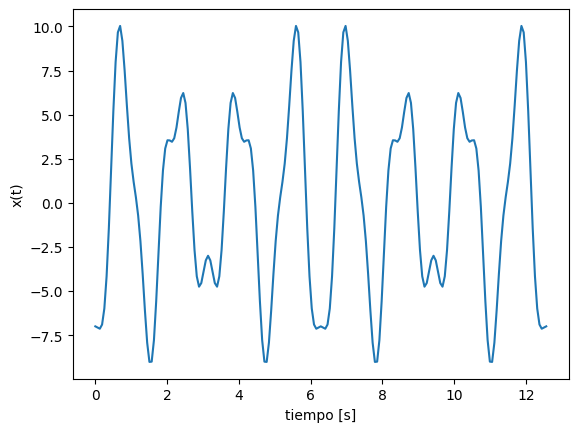

In [10]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
sym.init_printing() #se inicializa para mostrar en pantalla

#periodos y frecuencias de las señales
T1 = np.pi/2
T2 = 2*np.pi/5
T3 = np.pi/5
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
T = 2*np.pi #periodo señal cuasiperiódica

#definir frecuencia de muestreo Fs >= 2 Fmax
Fs = 10*max(F1,F2,F3)
tv = np.arange(0,2*T,1/Fs) #vector de tiempo según Fs diseñada

x = 7*np.sin(4*tv - np.pi/2) - 2*np.cos(5*tv) + 2*np.cos(10*tv)
plt.plot(tv,x)
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

Ahora hacemos la función cero y pendiente que al ingresarle la función y el nuevo rango arroja la nueva función xh

In [11]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())#cálculo pendiente
  b = xhmin - m*x.min() #cálculo cero
  xh = m*x+b #señal con cero y pendiente
  return xh

Ahora esa función se le aplica a la x(t) que se definió anteriormete y que como dice el ejercicio debe ir desde cero hasta 5 voltios. la nueva función es xh y como vemos en la nueva grafica ahora va de 0 a 5

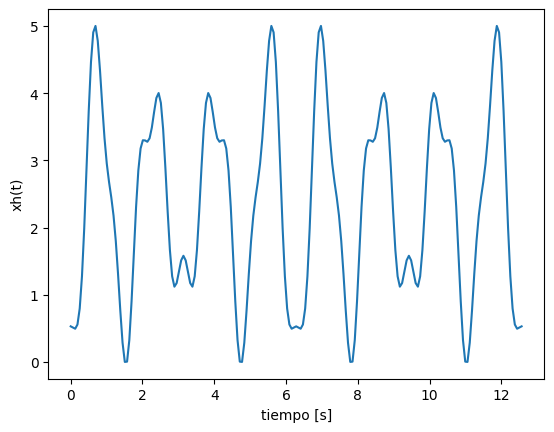

In [19]:
#señal cero y pendiente a 0 - 5 v
xhmax = 5
xhmin = 0
xh = my_ceropend(x,xhmax=xhmax,xhmin=xhmin).reshape(-1,1)
plt.plot(tv,xh)
plt.xlabel('tiempo [s]')
plt.ylabel('xh(t)')
plt.show()

Ahora se hace la cuantización con 3 bits y se declaran 8 estados
luego se hace el vector estados y recorre vector cero y spam discretizado para cuantizar. El resultado es xq que es la señal cuantizada

In [21]:
#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
ve = np.linspace(xhmin,xhmax,Ne).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))]

Finalmente graficamos todo el proceso.
La primera grafica es la señal original
luego esta la señal que se adaptó con el cero y pendiente que se hace con setm para poder ver los palitos y tambien se graficó tambien la función cuantizada

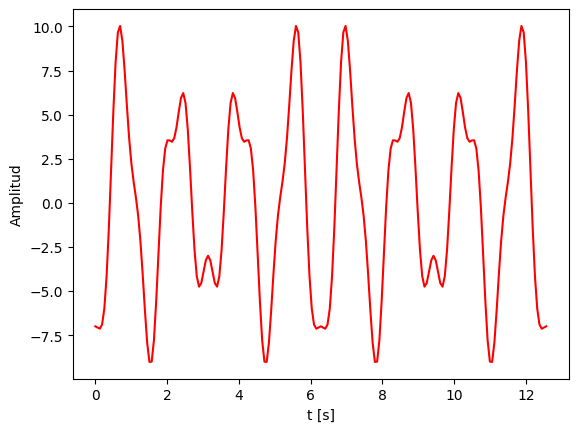

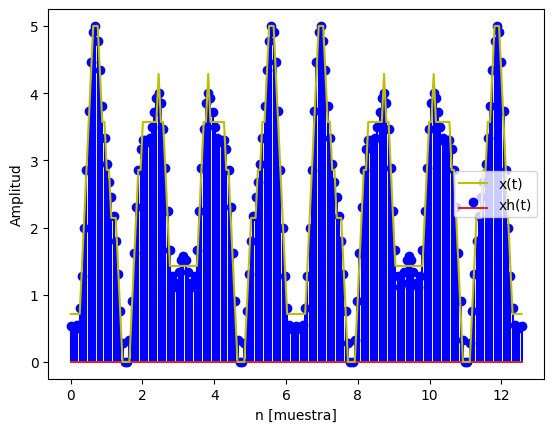

In [28]:
#gráficas de señales
plt.plot(tv,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.stem(tv,xh,'b',label='xh(t)')
plt.plot(tv,xq,'y',label='x(t)')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()